In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/treadmill-buyers-profile/datasets/aerofit_treadmill_data.csv


In [2]:
df= pd.read_csv("/kaggle/input/treadmill-buyers-profile/datasets/aerofit_treadmill_data.csv")

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
p=df['Product'].unique()
ms=df['MaritalStatus'].unique()
g= df['Gender'].unique()
display(ms,p,g)

array(['Single', 'Partnered'], dtype=object)

array(['KP281', 'KP481', 'KP781'], dtype=object)

array(['Male', 'Female'], dtype=object)

In [5]:
df.shape

(180, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


So, the dataset has 9 features with 180 records with zero null values. 3 object data type features which we will convert to numerical by applying encoding.

In [7]:
# Applying one hot encoding to 2 Features: Marital Status & Gender
df = pd.get_dummies(df, columns=['Gender','MaritalStatus'])

In [8]:
# Applying Ordinal/Label encoding to Product feature

from sklearn.preprocessing import LabelEncoder

# Assuming you have an array
identifiers = ['KP281', 'KP481', 'KP781']

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the array
encoded_identifiers = label_encoder.fit_transform(identifiers)

#Fit the Dataframe
df['Product_id']= label_encoder.fit_transform(df['Product'])


In [9]:
df.head()

,Product,Age,Education,Usage,Fitness,Income,Miles,Gender_Female,Gender_Male,MaritalStatus_Partnered,MaritalStatus_Single,Product_id
0,KP281,18,14,3,4,29562,112,False,True,False,True,0
1,KP281,19,15,2,3,31836,75,False,True,False,True,0
2,KP281,19,14,4,3,30699,66,True,False,True,False,0
3,KP281,19,12,3,3,32973,85,False,True,False,True,0
4,KP281,20,13,4,2,35247,47,False,True,True,False,0


So, Product_id[0,1,2] maps to ['entry_level_runners','mid_level_runners','advance_level_runners']

In [10]:
df['Gender_Male']=df['Gender_Male'].astype(int)
df['MaritalStatus_Partnered']=df['MaritalStatus_Partnered'].astype(int)

In [11]:
cols=['Gender_Female', 'MaritalStatus_Single']
#cols=['Gender_Female', 'MaritalStatus_Single']

df=df.drop(columns=cols)

In [12]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles,Gender_Male,MaritalStatus_Partnered,Product_id
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444,0.577778,0.594444,0.777778
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605,0.495291,0.492369,0.787866
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000,0.000000,0.000000,0.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000,0.000000,0.000000,0.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000,1.000000,1.000000,1.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000,1.000000,1.000000,1.000000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000,1.000000,1.000000,2.000000


In [13]:
# Importing Libraries for visualization 
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df.head()

,Product,Age,Education,Usage,Fitness,Income,Miles,Gender_Male,MaritalStatus_Partnered,Product_id
0,KP281,18,14,3,4,29562,112,1,0,0
1,KP281,19,15,2,3,31836,75,1,0,0
2,KP281,19,14,4,3,30699,66,0,1,0
3,KP281,19,12,3,3,32973,85,1,0,0
4,KP281,20,13,4,2,35247,47,1,1,0


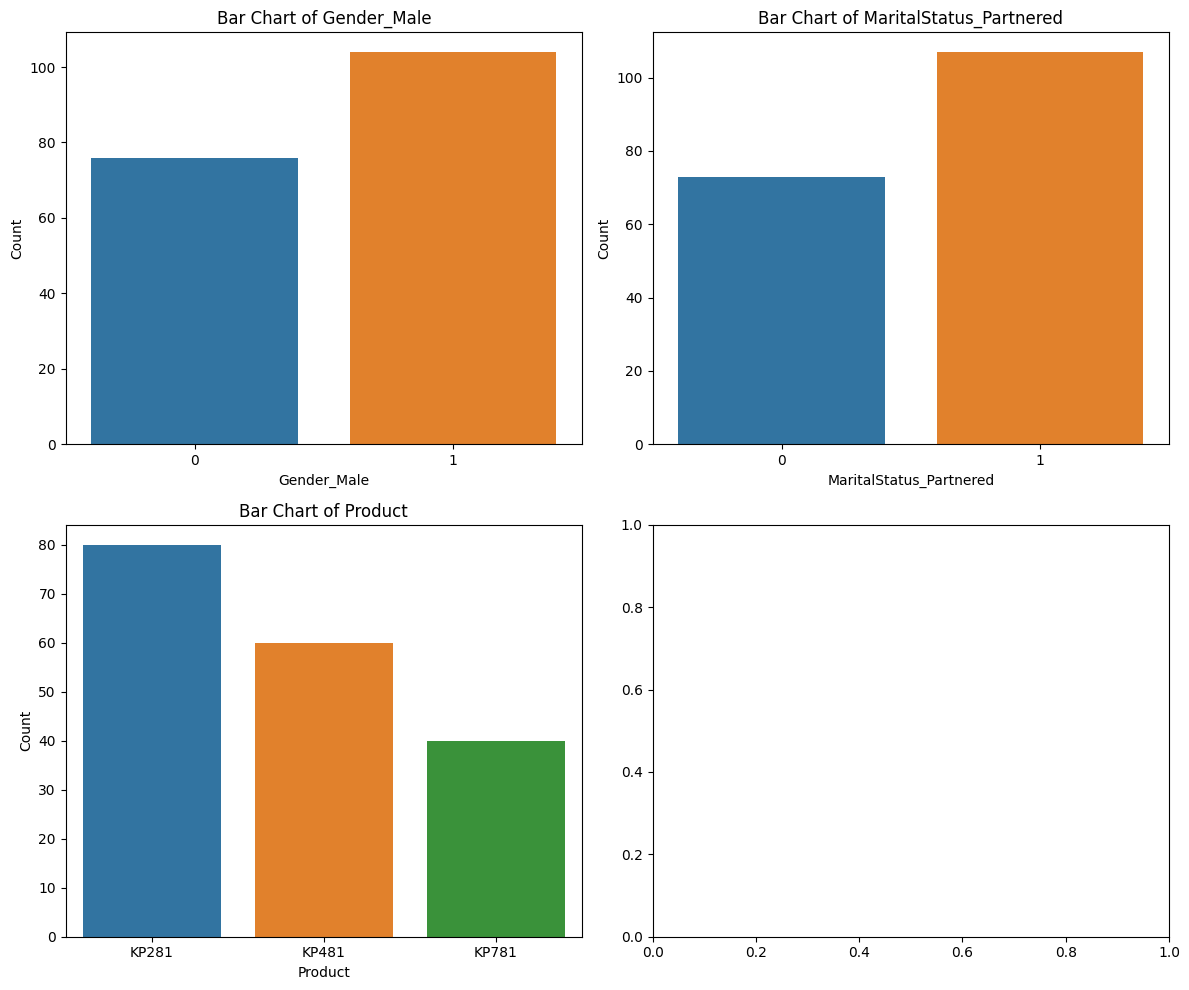

In [15]:
categorical_columns = ['Gender_Male', 'MaritalStatus_Partnered', 'Product']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through each categorical column and create a bar chart
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(f'Bar Chart of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Data Visualization

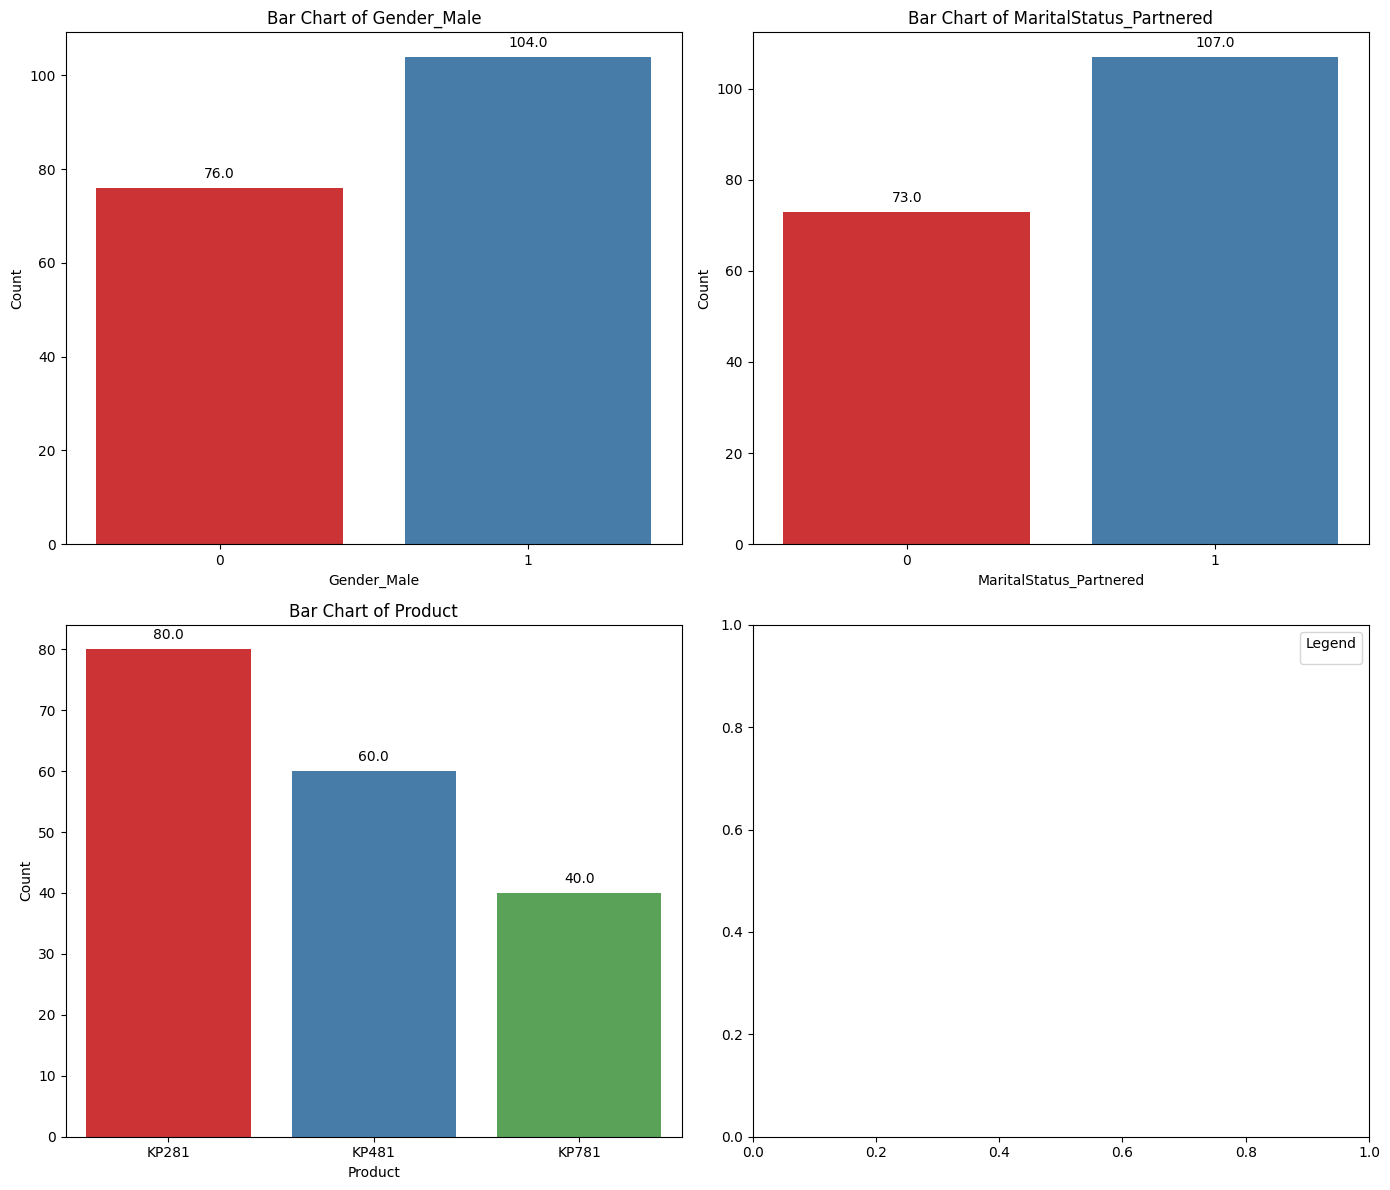

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with four categorical columns
# Replace 'CategoricalColumn1', 'CategoricalColumn2', etc. with your actual column names

categorical_columns = ['Gender_Male', 'MaritalStatus_Partnered', 'Product']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through each categorical column and create a bar chart
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=df, ax=axes[i], palette='Set1')
    axes[i].set_title(f'Bar Chart of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

    # Add count labels on top of each bar
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust layout
plt.tight_layout()

# Add a legend
plt.legend(title='Legend', labels=categorical_columns, loc='upper right')

# Show the plot
plt.show()


In [17]:
cat_columns=df['Product'].unique()

subdatasets=[]

for category in cat_columns:
    subdatasets.append(df[df['Product']==category])

Entry_level_Treadmill_df = subdatasets[0]
mid_level_Treadmill_df = subdatasets[1]
advance_level_Treadmill_df = subdatasets[2]

display(Entry_level_Treadmill_df.head(5),mid_level_Treadmill_df.head(5),advance_level_Treadmill_df.head(5))

,Product,Age,Education,Usage,Fitness,Income,Miles,Gender_Male,MaritalStatus_Partnered,Product_id
0,KP281,18,14,3,4,29562,112,1,0,0
1,KP281,19,15,2,3,31836,75,1,0,0
2,KP281,19,14,4,3,30699,66,0,1,0
3,KP281,19,12,3,3,32973,85,1,0,0
4,KP281,20,13,4,2,35247,47,1,1,0


,Product,Age,Education,Usage,Fitness,Income,Miles,Gender_Male,MaritalStatus_Partnered,Product_id
80,KP481,19,14,3,3,31836,64,1,0,1
81,KP481,20,14,2,3,32973,53,1,0,1
82,KP481,20,14,3,3,34110,106,0,1,1
83,KP481,20,14,3,3,38658,95,1,0,1
84,KP481,21,14,5,4,34110,212,0,1,1


,Product,Age,Education,Usage,Fitness,Income,Miles,Gender_Male,MaritalStatus_Partnered,Product_id
140,KP781,22,14,4,3,48658,106,1,0,2
141,KP781,22,16,3,5,54781,120,1,0,2
142,KP781,22,18,4,5,48556,200,1,0,2
143,KP781,23,16,4,5,58516,140,1,0,2
144,KP781,23,18,5,4,53536,100,0,0,2


#### Insight 1. Twice as many Entry Level Treadmills (80 units) were sold compared to the sales of Advanced Level Treadmills (40 units).



In [18]:
# Defining a function for basic EDA for datasets
def basiceda(dataframe): 
    Shape= dataframe.shape
    Information = dataframe.info()
    Basic_Stats = dataframe.describe()
    display(Shape,Information,Basic_Stats)
    

In [19]:
basiceda(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Product                  180 non-null    object
 1   Age                      180 non-null    int64 
 2   Education                180 non-null    int64 
 3   Usage                    180 non-null    int64 
 4   Fitness                  180 non-null    int64 
 5   Income                   180 non-null    int64 
 6   Miles                    180 non-null    int64 
 7   Gender_Male              180 non-null    int64 
 8   MaritalStatus_Partnered  180 non-null    int64 
 9   Product_id               180 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 14.2+ KB


(180, 10)

None

,Age,Education,Usage,Fitness,Income,Miles,Gender_Male,MaritalStatus_Partnered,Product_id
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444,0.577778,0.594444,0.777778
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605,0.495291,0.492369,0.787866
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000,0.000000,0.000000,0.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000,0.000000,0.000000,0.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000,1.000000,1.000000,1.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000,1.000000,1.000000,1.000000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000,1.000000,1.000000,2.000000


## Graphical Analysis 
### Univariate Analysis - Numerical Variables

#### Distance Plot

/tmp/ipykernel_18/2924561279.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], kde=True, ax=axis[0,0])
/tmp/ipykernel_18/2924561279.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Education'], kde=True, ax=axis[0,1])
/tmp/ipykernel_18/2924561279.py:6: UserWarning: 

`distplo

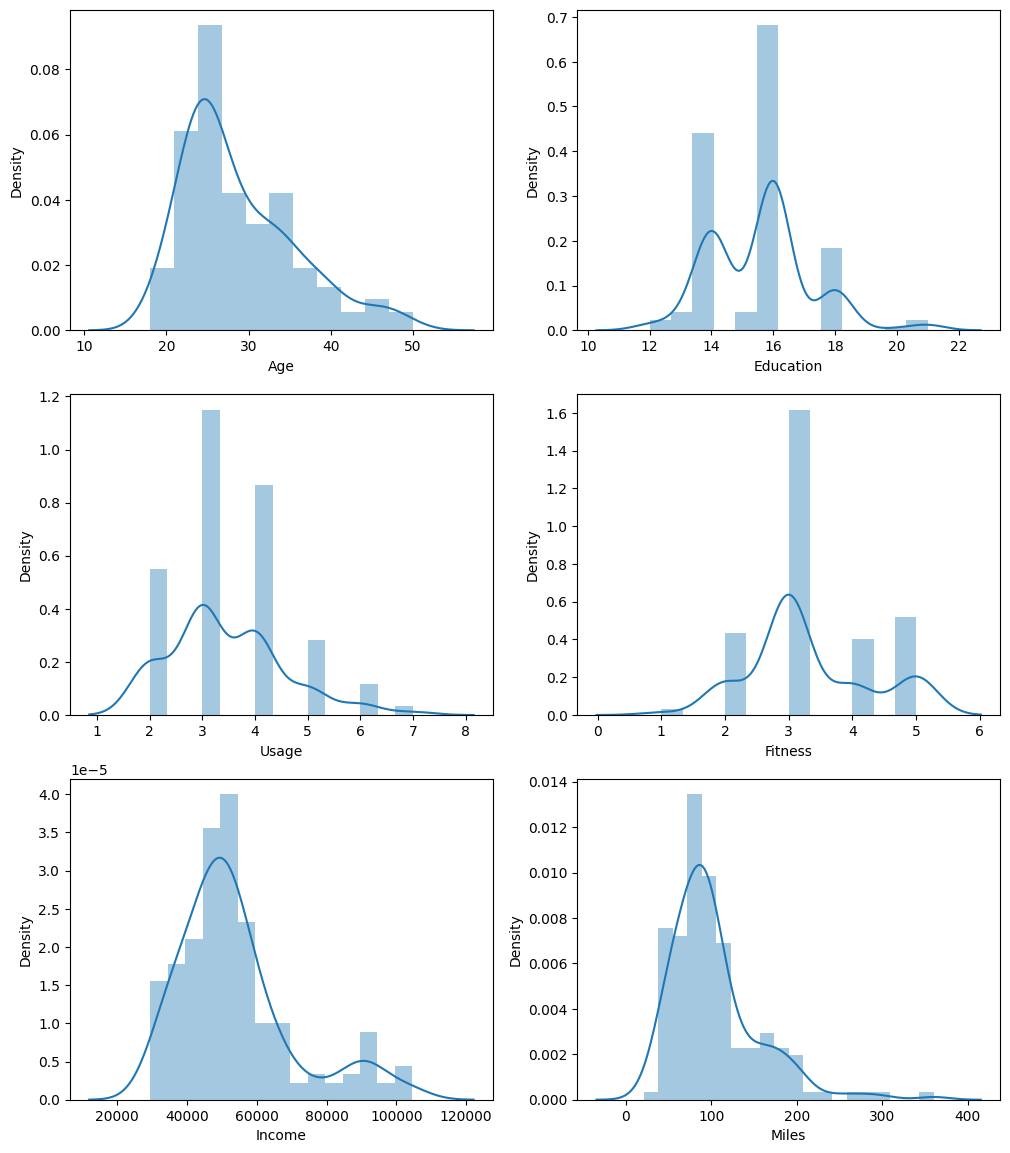

In [20]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.distplot(df['Age'], kde=True, ax=axis[0,0])
sns.distplot(df['Education'], kde=True, ax=axis[0,1])
sns.distplot(df['Usage'], kde=True, ax=axis[1,0])
sns.distplot(df['Fitness'], kde=True, ax=axis[1,1])
sns.distplot(df['Income'], kde=True, ax=axis[2,0])
sns.distplot(df['Miles'], kde=True, ax=axis[2,1])
plt.show()

### Observations:

- Both Miles and Income have significant outliers based on the above distribution.

- Also Miles and Income are "right-skewed distribution" which means the mass of the distribution is concentrated on the left of the figure.

- Customer with fitness level 3 buy a major chuck of treadmills.

- Majority of Customers fall within the $ 45,000 - $ 60,000 income range

### Count Plot

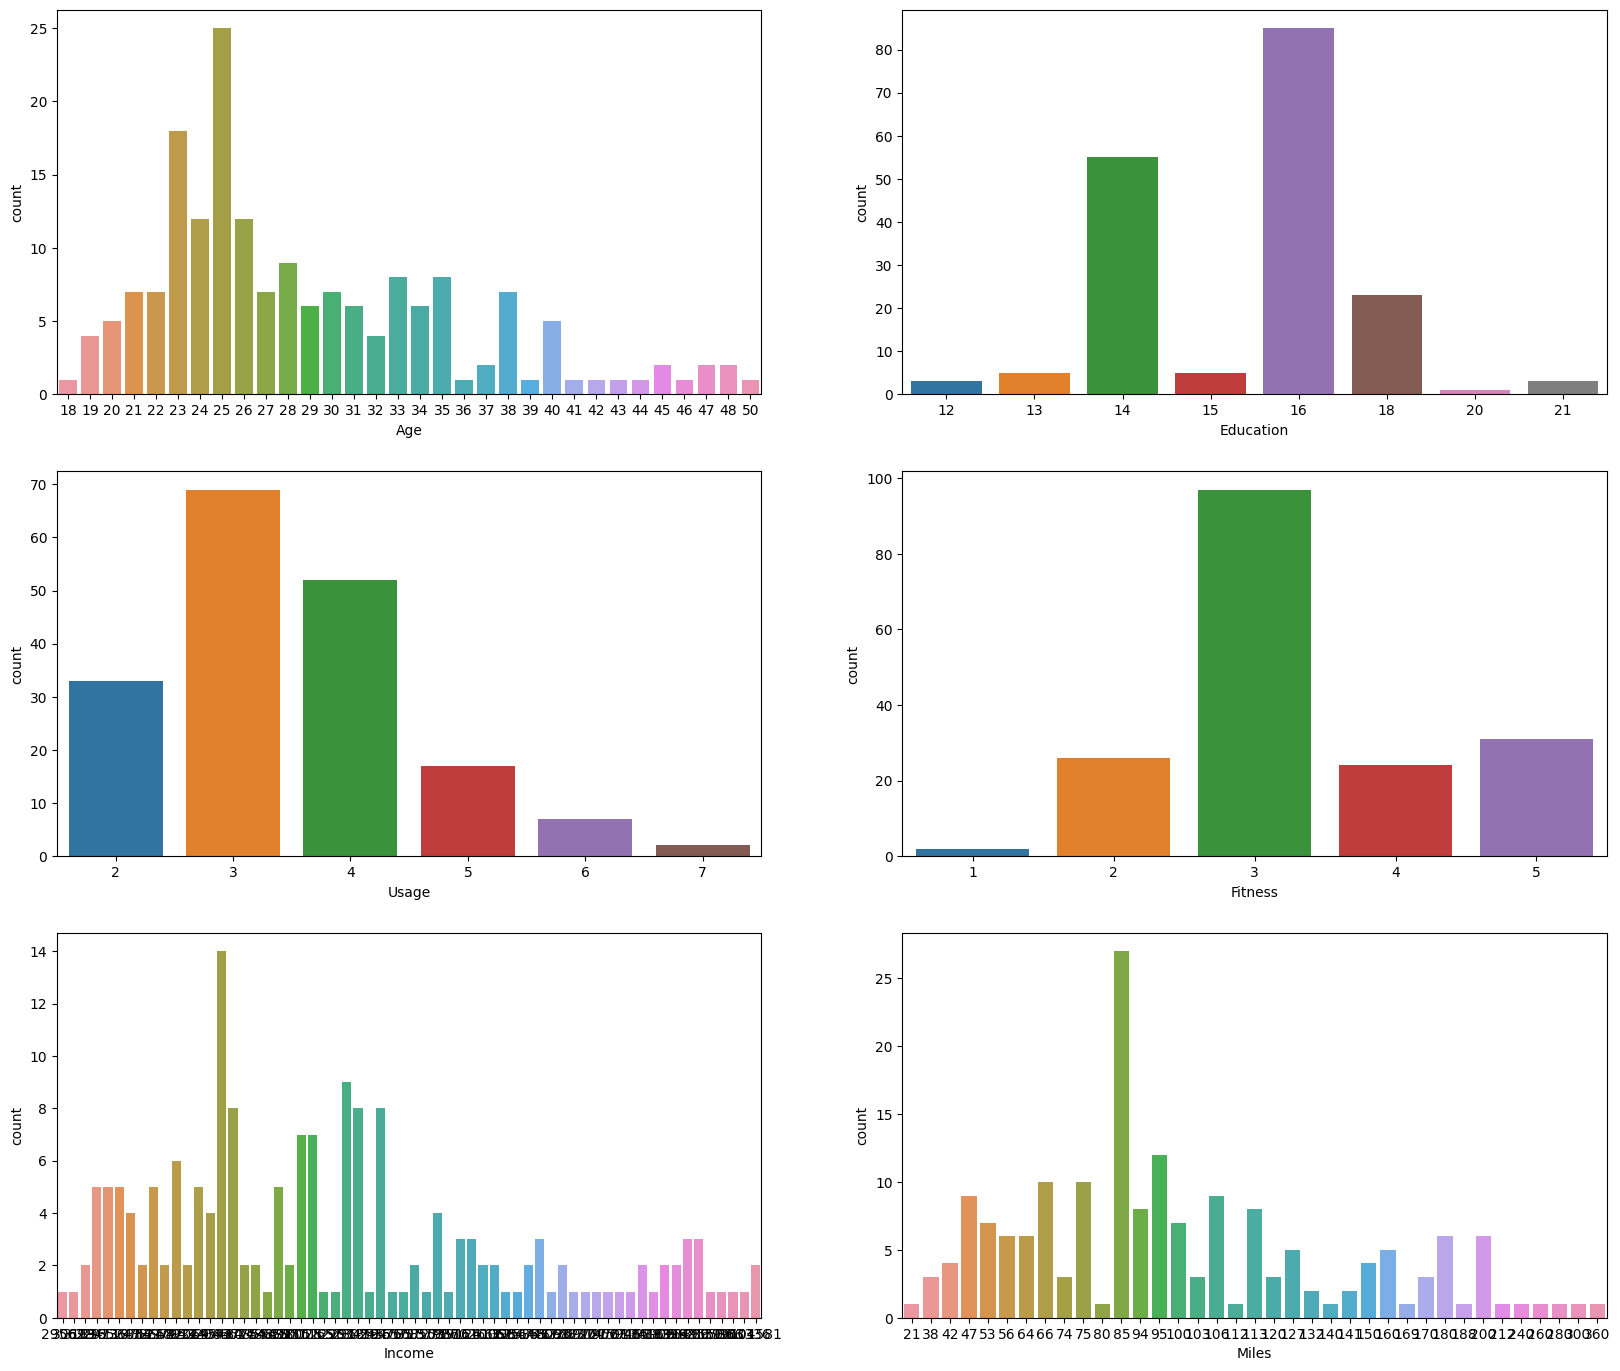

In [21]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))
fig.subplots_adjust(top=1.2)

sns.countplot(data=df, x="Age", ax=axis[0, 0])
sns.countplot(data=df, x="Education", ax=axis[0, 1])
sns.countplot(data=df, x="Usage", ax=axis[1, 0])
sns.countplot(data=df, x="Fitness", ax=axis[1, 1])
sns.countplot(data=df, x="Income", ax=axis[2, 0])
sns.countplot(data=df, x="Miles", ax=axis[2, 1])

plt.show()

### Observation 
- Fitness level '3' are the people who are the majority buyers of treadmill.
- People of Age between 23 to 28 years are the majority of target audience for treadmill buyers.

## Box Plot

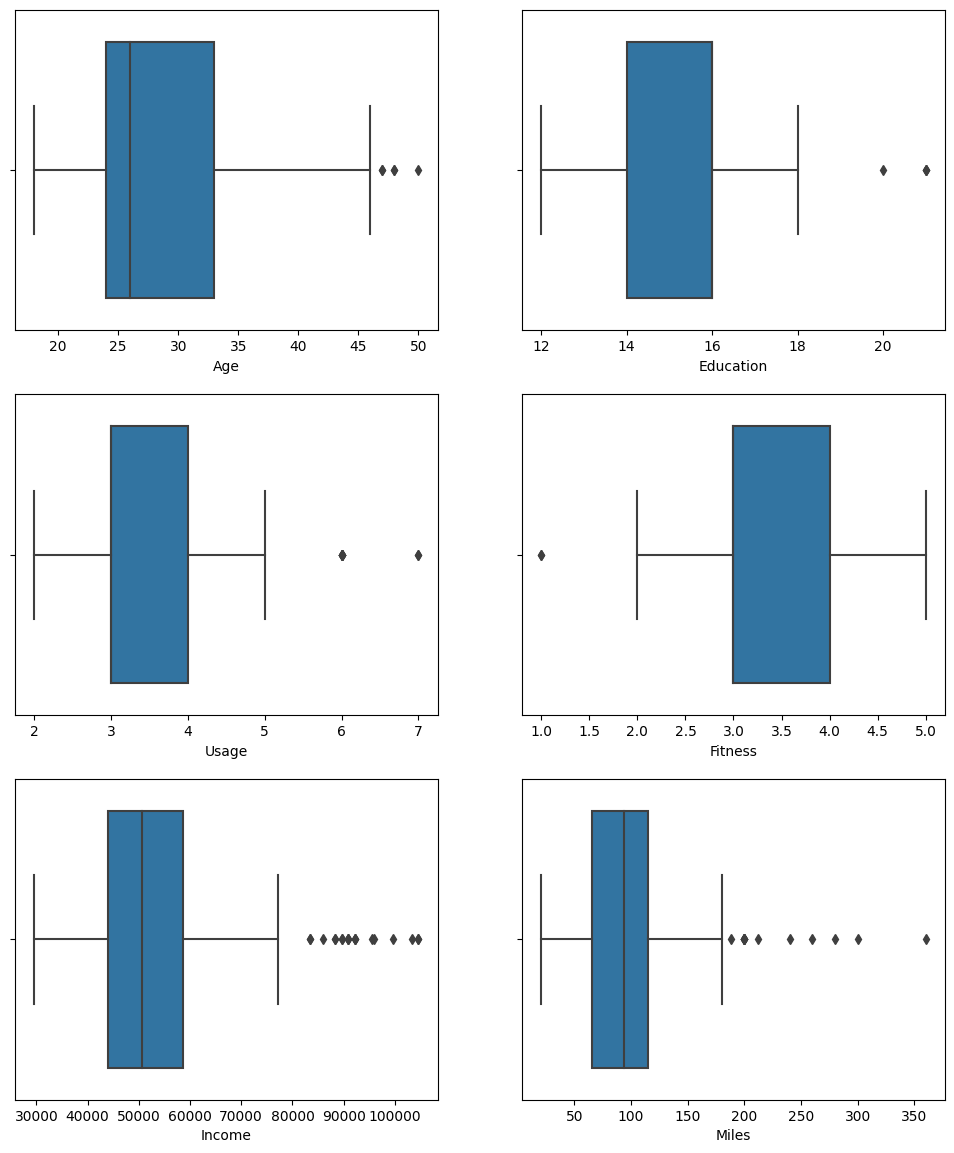

In [22]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="Age", orient='h', ax=axis[0, 0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0, 1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1, 0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1, 1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2, 0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2, 1])
plt.show()

### Observations:
- Variable 'Income' & 'Miles' have many outliers.
- Meanwhile, 'Age','Fitness','Usage' has few outliers.

## Univariate Analysis - Categorical Variables
### Count Plot

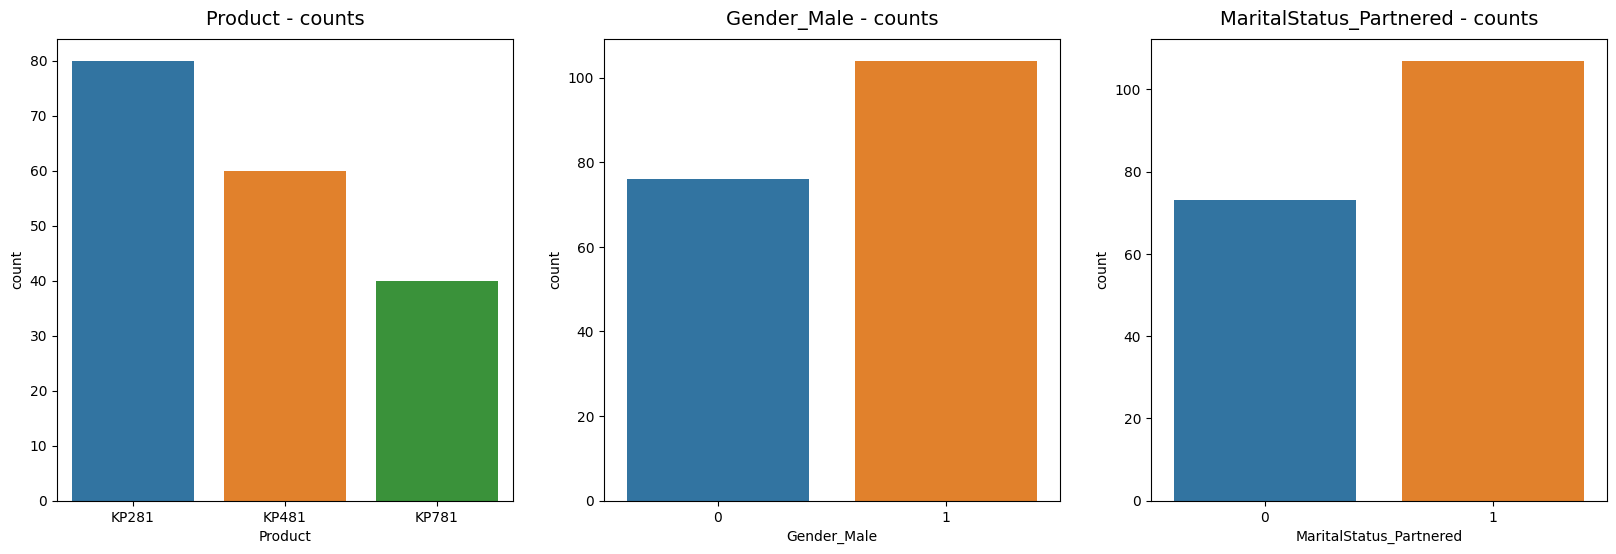

In [23]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.countplot(data=df, x='Product', ax=axs[0])
sns.countplot(data=df, x='Gender_Male', ax=axs[1])
sns.countplot(data=df, x='MaritalStatus_Partnered', ax=axs[2])

axs[0].set_title("Product - counts", pad=10, fontsize=14)
axs[1].set_title("Gender_Male - counts", pad=10, fontsize=14)
axs[2].set_title("MaritalStatus_Partnered - counts", pad=10, fontsize=14)
plt.show()

### Observations

- KP281 is the most frequent product and best-selling product.
- In Gender, there are more Males who are using treadmills than Females.
- The treadmills are more likely to be purchased by partnered people

## Bivariate Analysis
Checking if features have any effect on the product purchased.

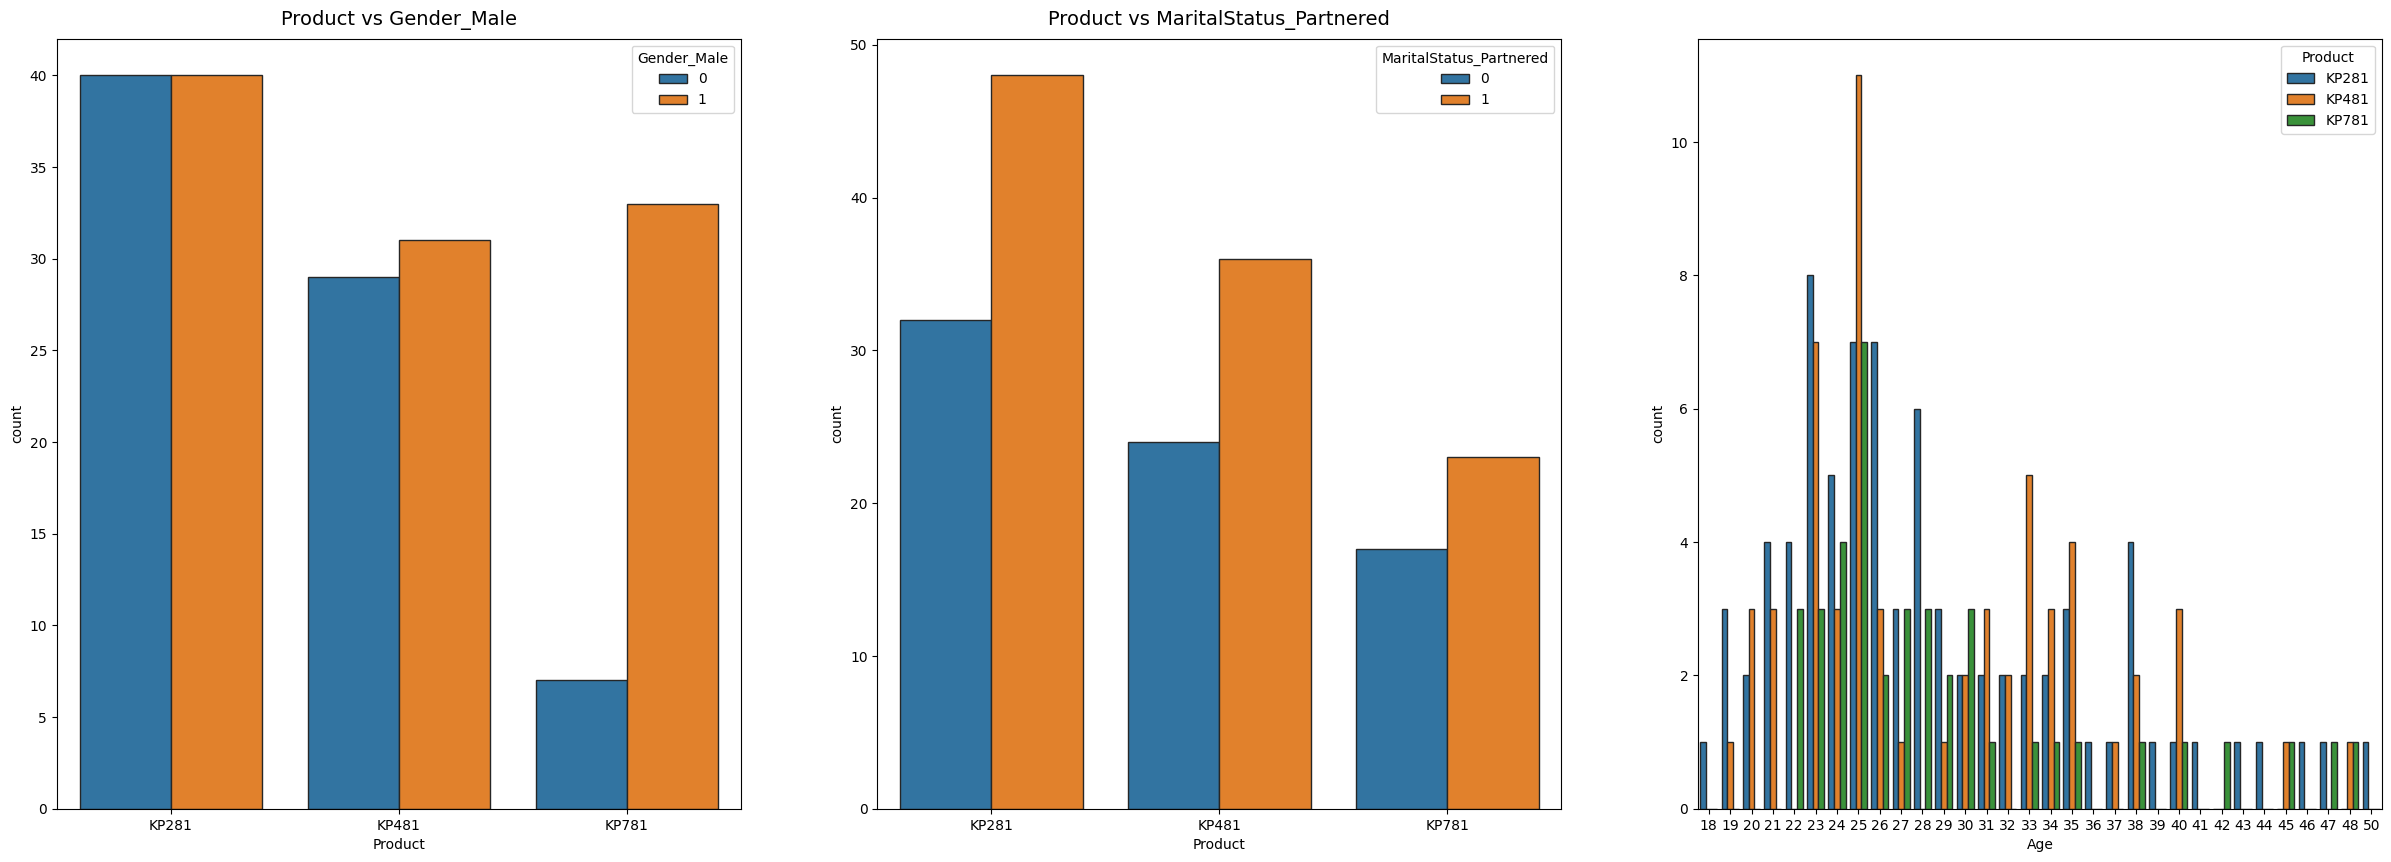

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
sns.countplot(data=df, x='Product', hue='Gender_Male', edgecolor="0.15", ax=axs[0])
sns.countplot(data=df, x='Product', hue='MaritalStatus_Partnered', edgecolor="0.15", ax=axs[1])
sns.countplot(data=df, x='Age', hue='Product', edgecolor="0.15", ax=axs[2])
axs[0].set_title("Product vs Gender_Male", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus_Partnered", pad=10, fontsize=14)
plt.show()

## Obervations:

#### Product vs Gender:
    Equal number of males and females have purchased KP281 product and Almost same for the product KP481
    Most of the Male customers have purchased the KP781 product.
#### Product vs MaritalStatus:
    Customer who is Partnered, is more likely to purchase the product.

#### Age vs Product:
    Customers with age of 25 are more likely to purchase the KP481 product.

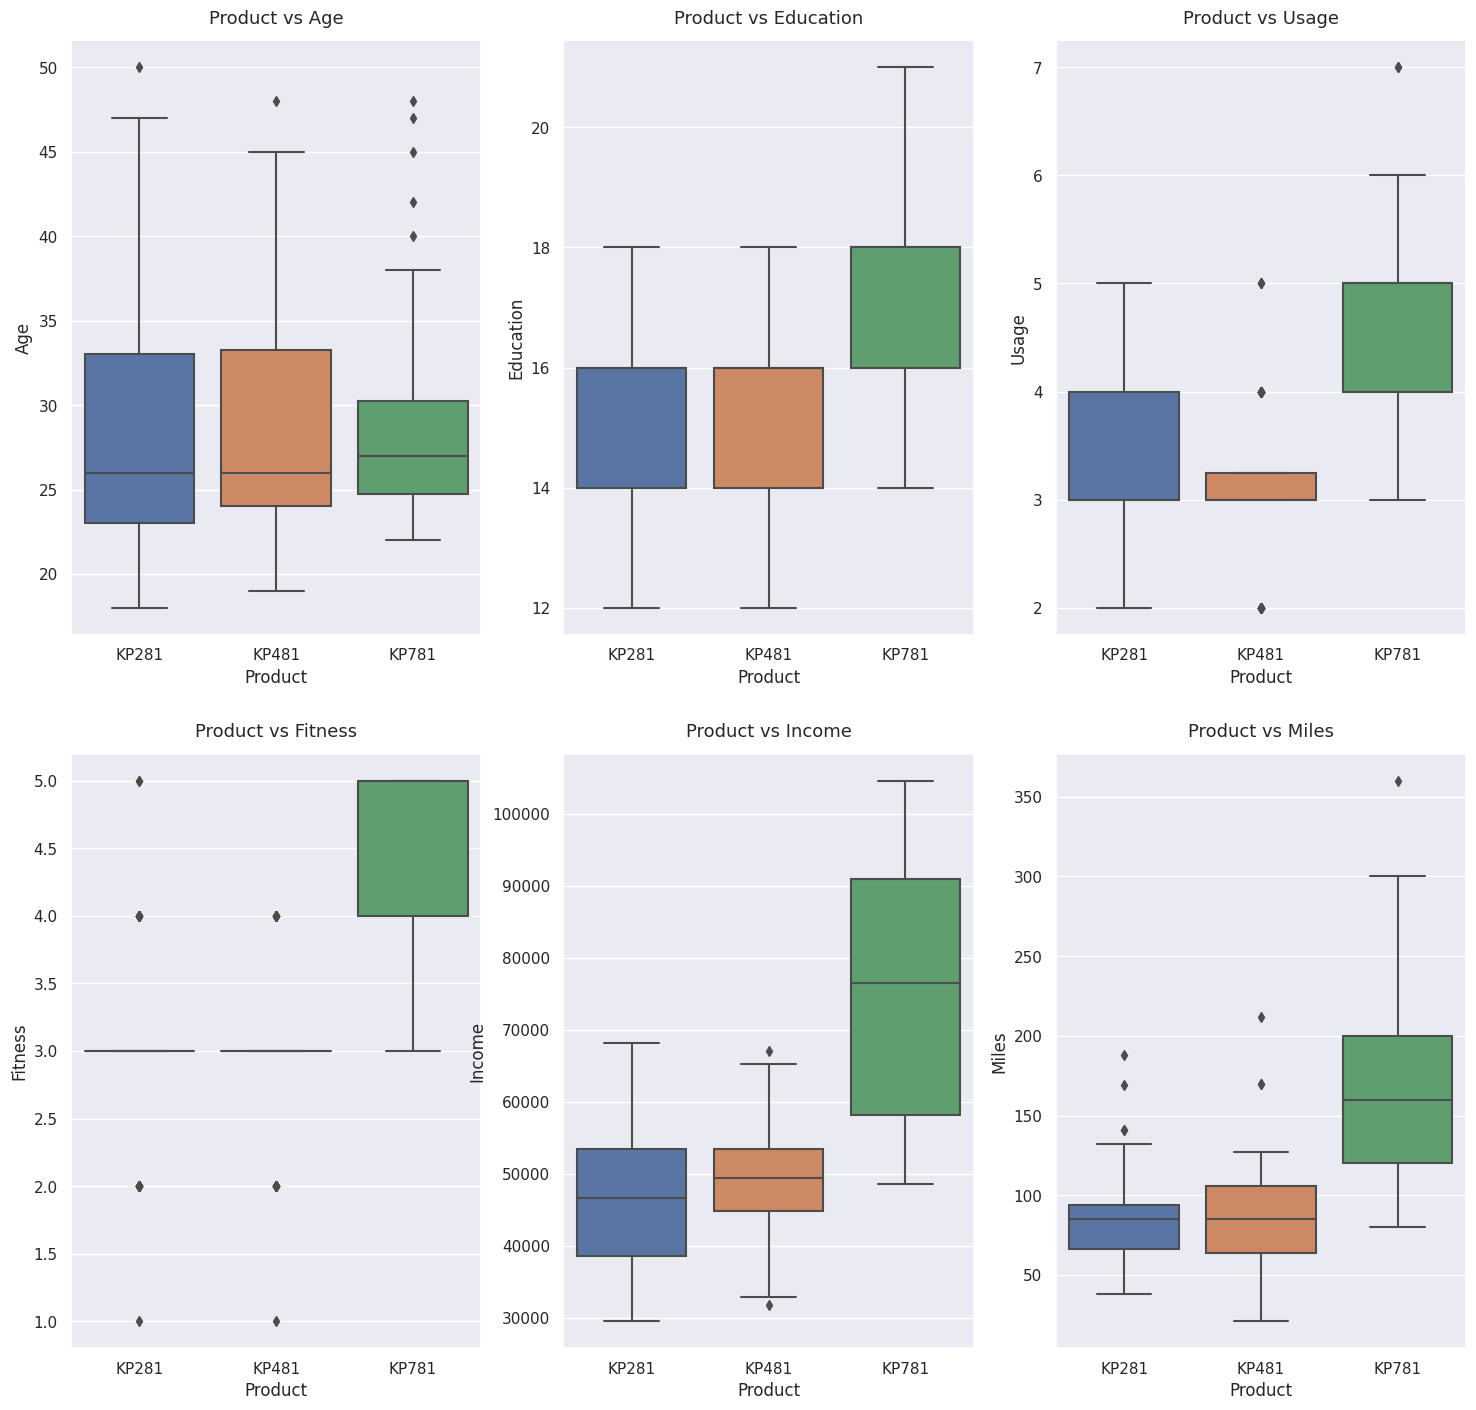

In [25]:
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set(color_codes = True)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='Product', y=attributes[count], ax=axs[i,j])
        axs[i,j].set_title(f"Product vs {attributes[count]}", pad=12, fontsize=13)
        count += 1

## Observtions:
- ### Product vs Age:
    Customers purchasing products KP281 & KP481 are having same Age median value. Customers whose age lies between 25-30, are more likely to buy the KP781 product
- ### Product vs Education
    Customers whose Education is greater than 16, have more chances to purchase the KP781 product.
    While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481.
- ### Product vs Usage
    Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product.
    While the other customers are likely to purchase KP281 or KP481.
- ### Product vs Fitness
    The more the customer is fit (fitness >= 3), the higher the chances of the customer purchasing the KP781 product.
- ### Product vs Income
    The higher the Income of the customer (Income >= 60000), the higher the chances of the customer purchasing the KP781 product.
- ### Product vs Miles
    If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy the KP781 product.

## Multivariate Analysis

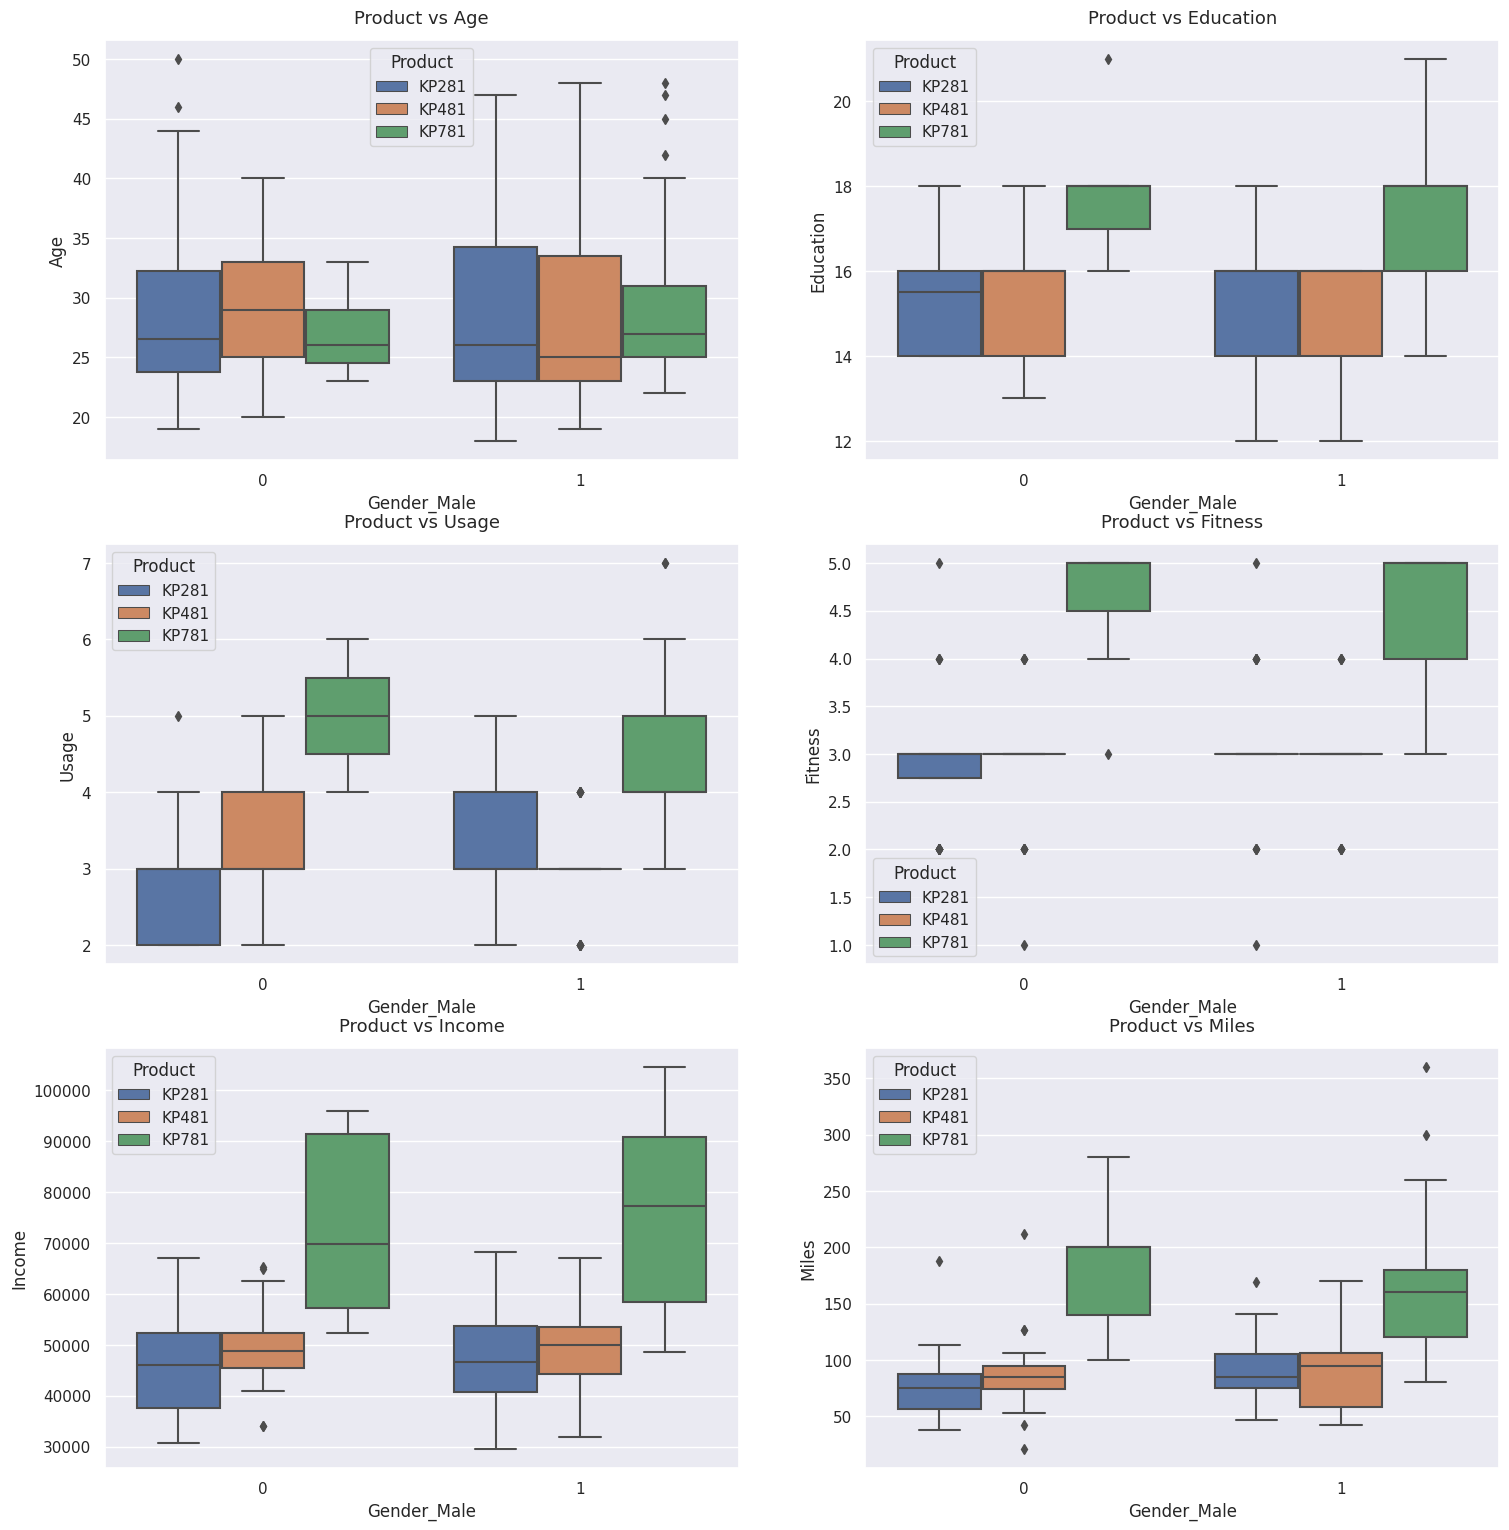

In [26]:
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set(color_codes = True)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
fig.subplots_adjust(top=1.3)
count = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=df, x='Gender_Male', y=attributes[count], hue='Product', ax=axs[i,j])
        axs[i,j].set_title(f"Product vs {attributes[count]}", pad=12, fontsize=13)
        count += 1

## Obervations:

- Females planning to use the treadmill 3-4 times a week, are more likely to buy the KP481    product.

## Correlation Analysis

In [27]:
cols =['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
df[cols].cov()

,Age,Education,Usage,Fitness,Income,Miles
Age,48.212166,3.149410,0.113470,0.406828,5.884446e+04,13.186530
Education,3.149410,2.614867,0.693172,0.636623,1.670472e+04,25.770795
Usage,0.113470,0.693172,1.176785,0.695469,9.303043e+03,42.709808
Fitness,0.406828,0.636623,0.695469,0.919429,8.467925e+03,39.073246
Income,58844.463439,16704.717815,9303.042582,8467.925388,2.724706e+08,465265.361887
Miles,13.186530,25.770795,42.709808,39.073246,4.652654e+05,2689.833489


In [28]:
df[cols].corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


## Heatmaps

<Axes: >

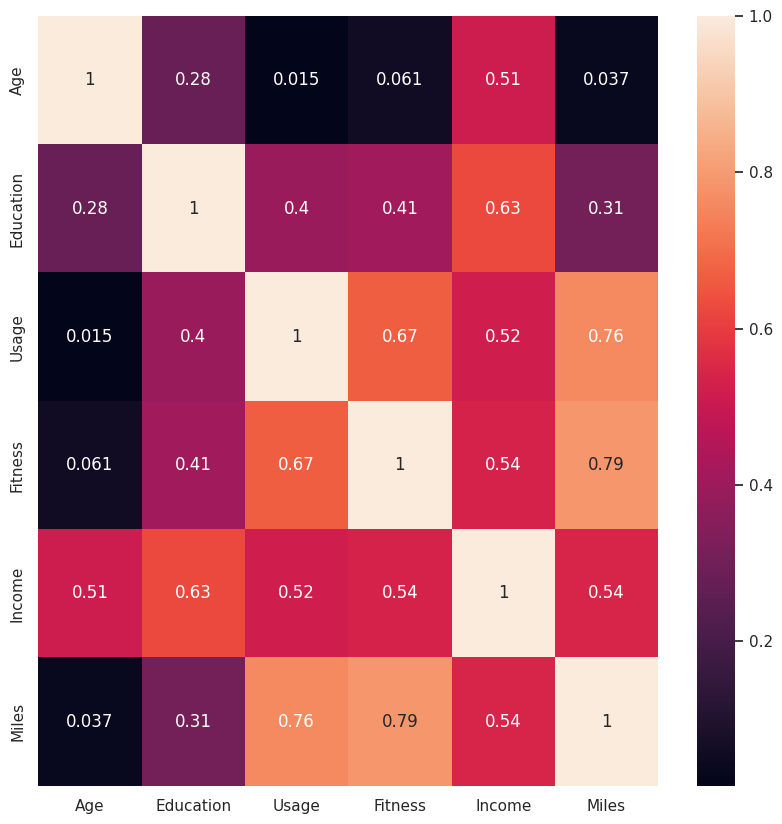

In [29]:
fig,ax = plt.subplots(figsize=(10,10))

sns.heatmap(df[cols].corr(), ax=ax, annot=True)

## Observations:

- (Miles & Fitness) and (Miles & Usage) attributes are highly correlated, which means if a customer's fitness level is high they use more treadmills.

- Income and Education shows a strong correlation. High-income and highly educated people prefer the KP781 treadmill which is having advanced features.

- There is no correlation between (Usage & Age) or (Fitness & Age) attributes, which mean Age should not be a barrier to using treadmills or specific model of treadmills.

## Pair Plots

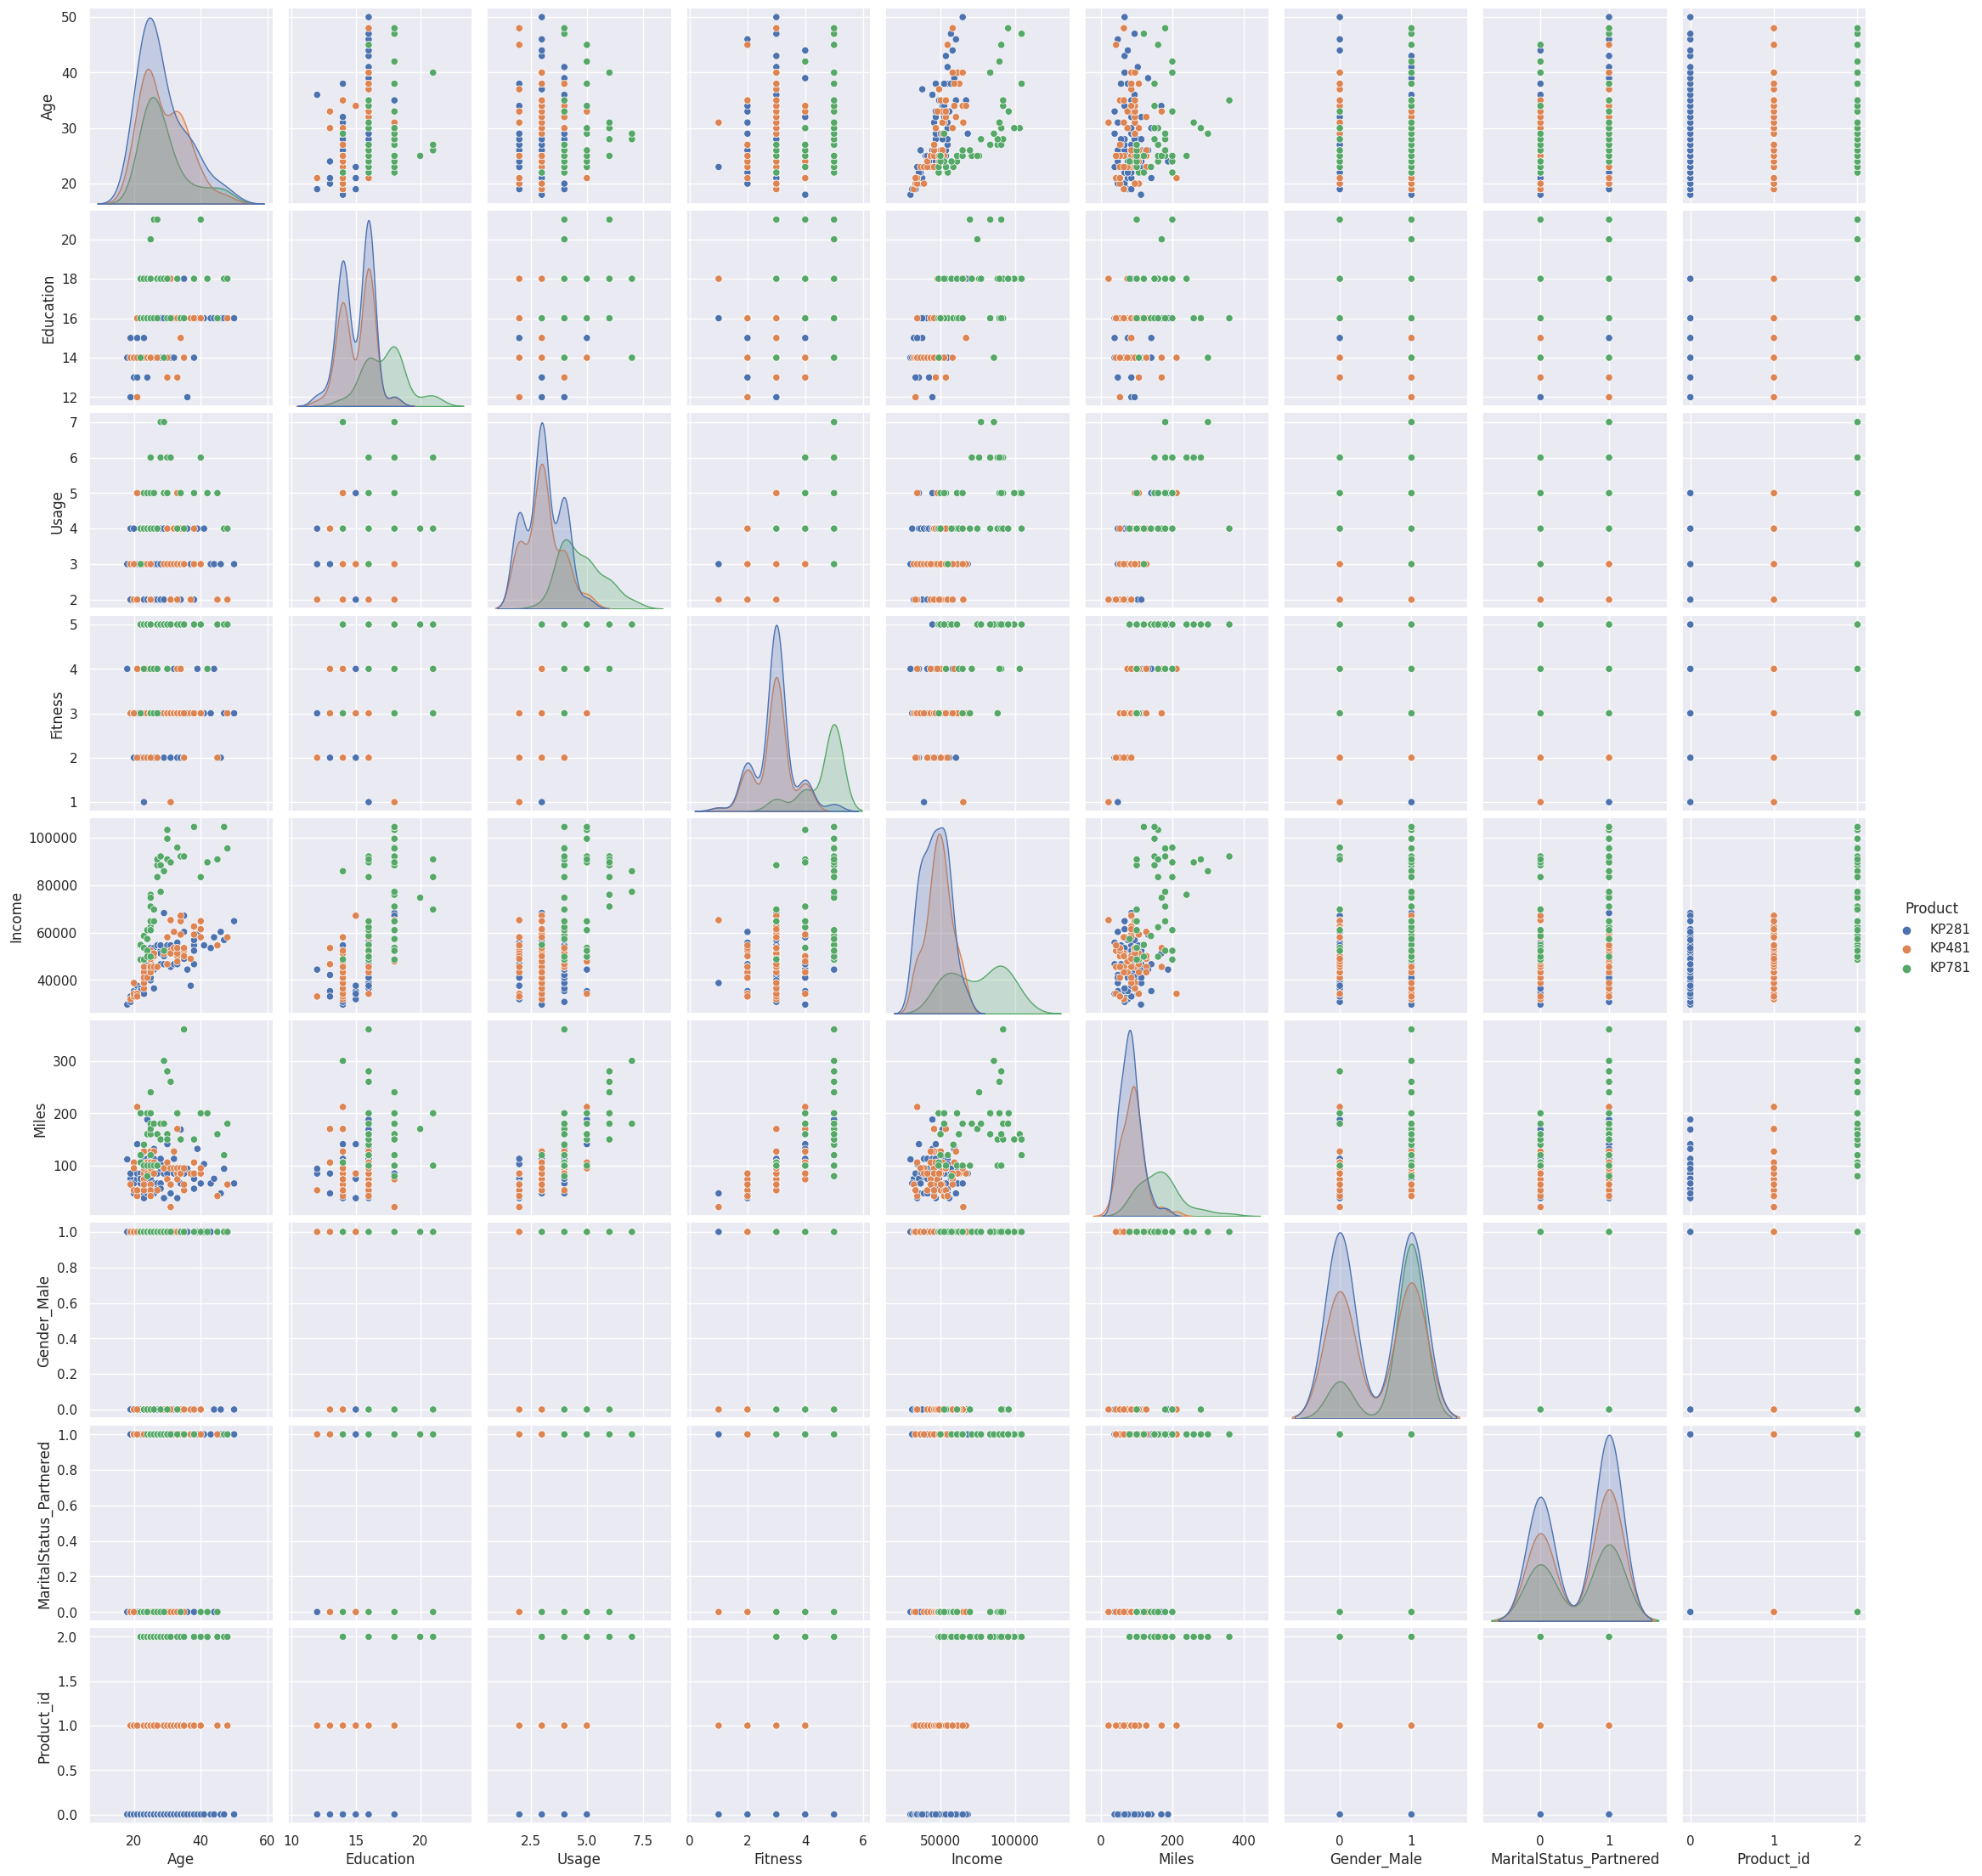

In [30]:
sns.pairplot(df,hue='Product')


## Actionable Insights & Recommendations
### Actionable Insights:
- Model KP281 is the best-selling product. 44.0% of all treadmill sales go to model KP281.
- The majority of treadmill customers fall within the $ 45,000 - $ 80,000 income bracket.
- 83% of treadmills are bought by individuals with incomes between $ 35,000 and $ 85,000
- There are only 8% of customers with incomes below $ 35000 who buy treadmills.
- 88% of treadmills are purchased by customers aged 20 to 40.
- Miles and Fitness & Miles and Usage are highly correlated, which means if a customer's fitness level is high they use more treadmills.

- KP781 is the only model purchased by a customer who has more than 20 years of education and an income of over $ 85,000.

- With Fitness level 4 and 5, the customers tend to use high-end treadmills and the average number of miles is above 150 per week

### Recommendations:
- KP281 & KP481 are popular with customer income of $ 45,000 - $ 60,000 and can be offered by these companies as affordable models.
- KP781 should be marketed as a Premium Model and marketing it to high income groups and educational over 20 years market segments could result in more sales.
- The KP781 is a premium model, so it is ideally suited for sporty people who have a high average weekly mileage and can be afforded by the high income customers.
- Aerofit should conduct market research to determine if it can attract customers with income under $ 35,000 to expand its customer base.